In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Data Source: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [2]:
### DETECTING FRAUDULENT WINE USING CHEMICAL DATA AND SUPPORT VECTOR MACHINE ###
df = pd.read_csv(filepath_or_buffer='../notebooks/DATA/wine_fraud.csv')

In [3]:
df.head()
# QUALITY LOOKS LIKE THE LABLE TO PREDICT 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df.info()
# POSSIBLY TWO CATEGORICAL COLUMN | MIGHT NEED TO ONE-HOT ENCODE  | NO MISSING DATA 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


<Axes: xlabel='quality', ylabel='count'>

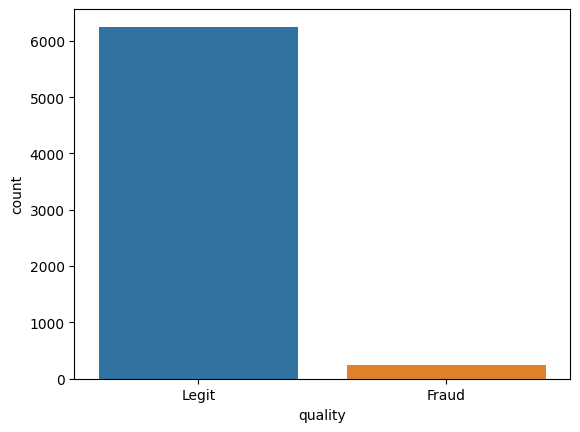

In [5]:
# CHECK THE DISTRIBUTION OF THE LABEL 
sns.countplot(data=df, x='quality')
# WIDELY SKEWED TOWARD LEGIT 


In [6]:
# VERY LOW PROPRTION OF FRAUD 
df['quality'].value_counts()


quality
Legit    6251
Fraud     246
Name: count, dtype: int64

Fraud Propotion in Red Wine = 3.9399624765478425
Fraud Propotion in White Wine = 3.736218864842793


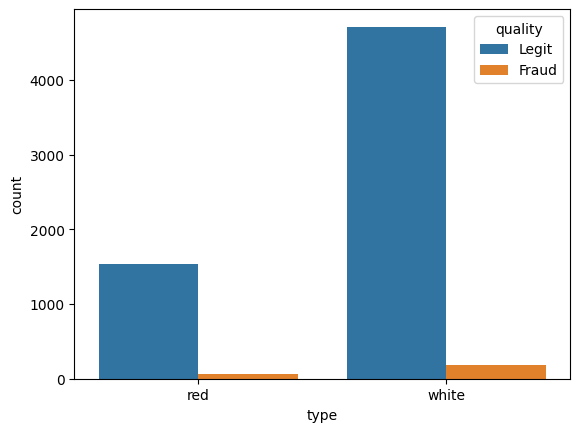

In [16]:
## CHECK TYPE OF WINES VS FRAUD  
sns.countplot(data=df, x='type', hue='quality')

#NO OF EXACT FRAUD IN RED WIND AND WIGHT WINE 
fraud_count  = df[['quality','type']][df['quality'] == 'Fraud'].groupby(by='type').count().rename(mapper={'quality' : 'fradu_count'} ,axis=1)
count_of_type = df['type'].value_counts()

print(f'Fraud Propotion in Red Wine = {fraud_count.iloc[0,0] * 100 /count_of_type["red"]}')
print(f'Fraud Propotion in White Wine = {fraud_count.iloc[1,0] * 100 /count_of_type["white"]}')

In [17]:
### DO SOME ENCODING. SINCE THERE ARE JUST TWO CATAGORY IN DATA, WE CAN MAP 1, 0  to respective values avoinding multi-colinearity
df['quality'] = df['quality'].map(arg={'Legit': 0, 'Fraud':1})
df['type'] = df['type'].map(arg={'red': 0, 'white':1})

<Axes: >

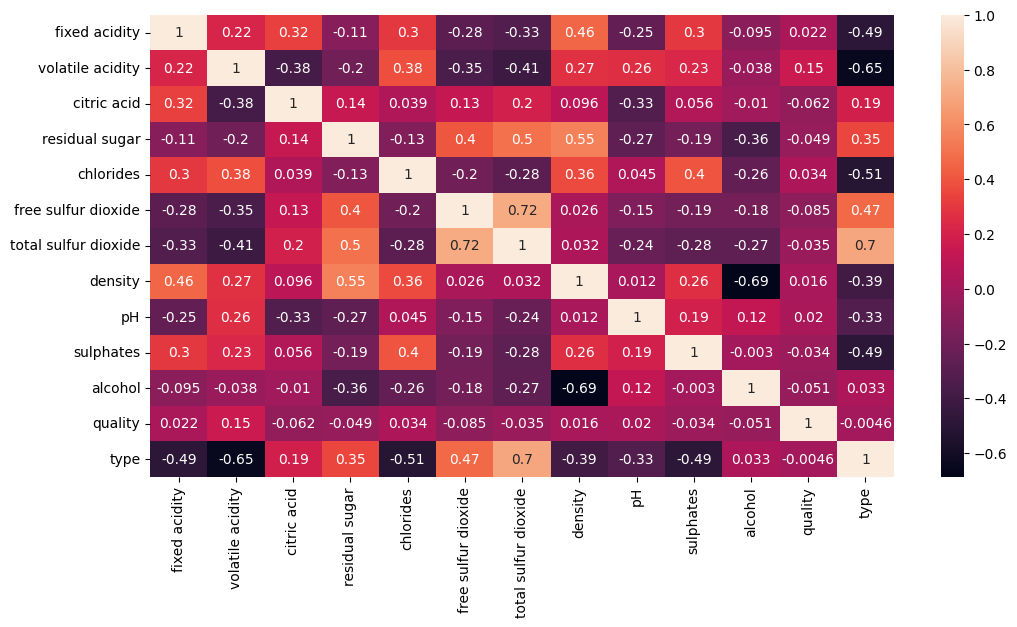

In [18]:
## LET's CHECK SOME CORRELATIONS 
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(), annot=True)
## MODEL MIGHT HAVE HIGH IRREDUCIBLE ERROR 

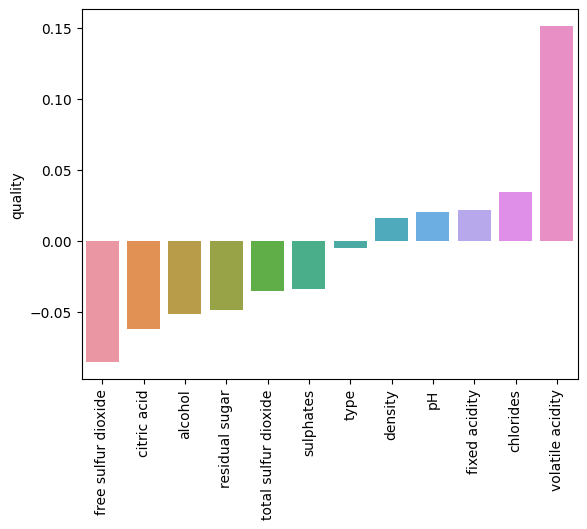

In [21]:
#LETS SEE THE CORR PLOT  OF QUALITY WITH DIFFERENT FEATURES
quality_corr = df.corr()['quality'].drop('quality').sort_values(ascending=True)
sns.barplot(x=quality_corr.index , y=quality_corr)
plt.xticks(rotation=90);
### PRETTY LOW SIGNALS

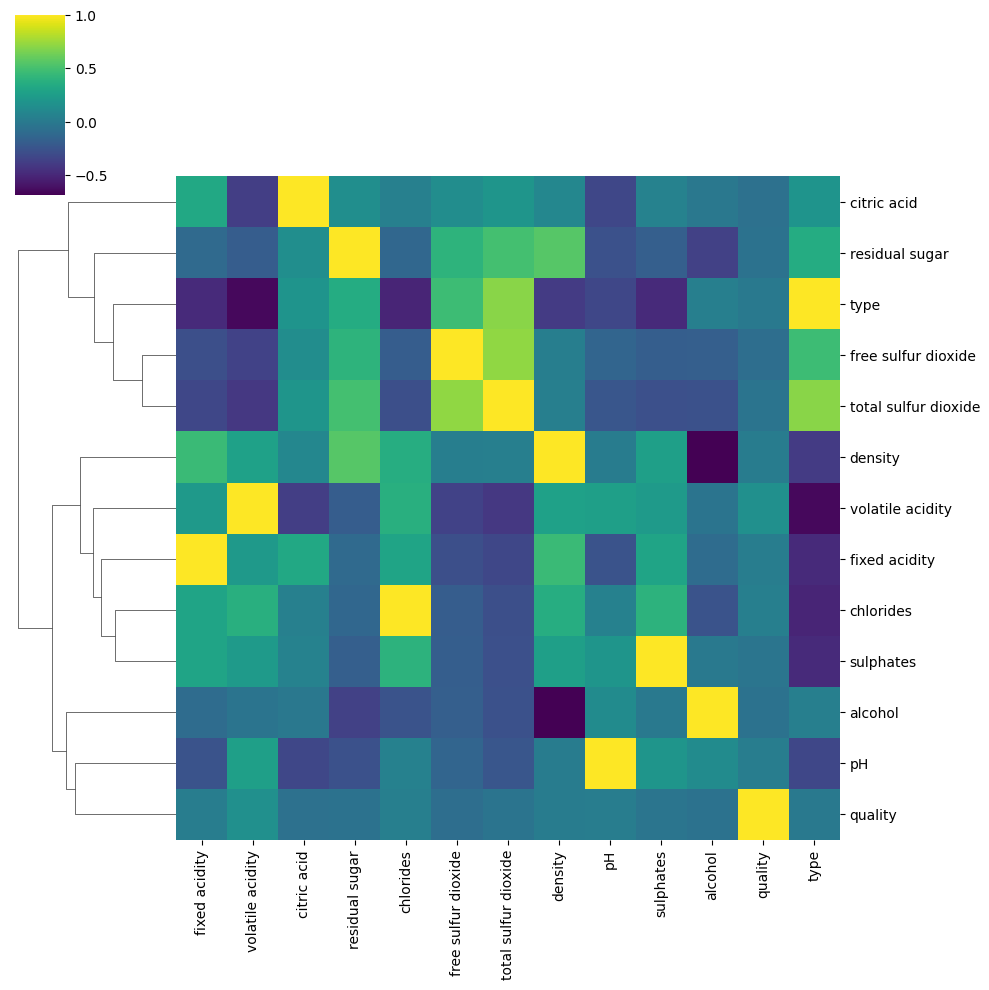

In [42]:
# CHECK THE CLUSTER MAP OF THE DATA CORRELATION
# WE SEE QUALITY PH AND ALCOHOL ARE CLUSTERED TOGETHER 

sns.clustermap(data=df.corr(), col_cluster=False , cmap='viridis')

In [47]:
#LETS USE SVM TO CLASSIFY THIS DATA 
X = df.drop(columns='quality')
y = df['quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

# MAKE A SVM PIPE | Since data is not balanced, adjust weight 
svm_classifier_pipe = make_pipeline(StandardScaler(), SVC(max_iter=-1, class_weight='balanced'))


In [49]:
svm_classifier_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [57]:
## HYPERPARAMETER TO SEARCH FOR 
hyper_parm = {'svc__kernel':['rbf', 'linear', 'poly'] , 'svc__C' : np.logspace(-4,4,11), 'svc__degree':[1,2], 'svc__gamma':['scale', 'auto']}

In [60]:
### CREATE A GRID SEARCHER WITH 5 FOLD CROSSVALIDATION
model_grid  = GridSearchCV(estimator=svm_classifier_pipe , param_grid=hyper_parm, scoring='f1', n_jobs=-1, cv=5, verbose=1)